In [1]:
from Parser import Parser
from Lexer import Lexer

In [2]:
import pydot
from cStringIO import StringIO

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def to_image(graph):
    pd = pydot.graph_from_dot_data(graph.to_dot())[0]
    png_str = pd.create_png(prog='dot')
    sio = StringIO()
    sio.write(png_str)
    sio.seek(0)
    img = mpimg.imread(sio)
    width = 12
    height = 12
    # plot the image
    plt.figure(figsize=(width, height))
    imgplot = plt.imshow(img, aspect='equal')
    plt.show(block=False)

In [21]:
import random
from tqdm import tqdm

p = Parser(Lexer(open('AdamStyle.txt').read()))
p.parse()
print p.startGraph

def is_good(graph,config):
    v_count = len(graph.vertices)
    min_v = config.get('min_vertices',0)
    max_v = config.get('max_vertices',float('inf'))
    if v_count < min_v:
        return False
    if v_count > max_v:
        return False
    
    return True

def apply_rules(start,productions,config):
    
    cloned = start.clone()
    while not is_good(cloned,config):
        cloned = start.clone()
        #to_image(cloned)
        acceptable = []
        for rule in productions:
            #print rule
            matches = rule.find_matches(cloned)
            if len(matches) > 0:
                acceptable.append((rule,matches))
        path = []
        while len(acceptable) > 0:
            rule, matches = random.choice(acceptable)
            match = random.choice(matches)
            #print len(matches)
            #print '\nBEFORE:\n',cloned
            #print 'Applying {\n', rule.lhs,'\n=>\n',rule.rhs,'\n}\n'

            path.append(rule)
            rule.apply_to(cloned,match)
            #print '\nAFTER:\n',cloned
            acceptable = []
            for rule in productions:
                #print '\nRule LHS\n',rule.lhs
                #print 'Rule RHS\n',rule.rhs
                matches = rule.find_matches(cloned)
                if len(matches) > 0:
                    acceptable.append((rule,matches))
            #to_image(cloned)
    return cloned,path
paths = []

reverse_productions = [r.reverse() for r in p.productions]

for ii in tqdm(range(5)):
    cloned,path = apply_rules(p.startGraph,p.productions,p.configuration)
    to_image(cloned)
    paths.append(path)
    destroyed,path = apply_rules(cloned,reverse_productions)
    to_image(destroyed)
    while len(destroyed.vertices) > 1:
        destroyed,path = apply_rules(cloned,reverse_productions)
        to_image(destroyed)
    

    






  0%|          | 0/5 [00:00<?, ?it/s]

vertex: Seednan



TypeError: apply_rules() takes exactly 3 arguments (2 given)

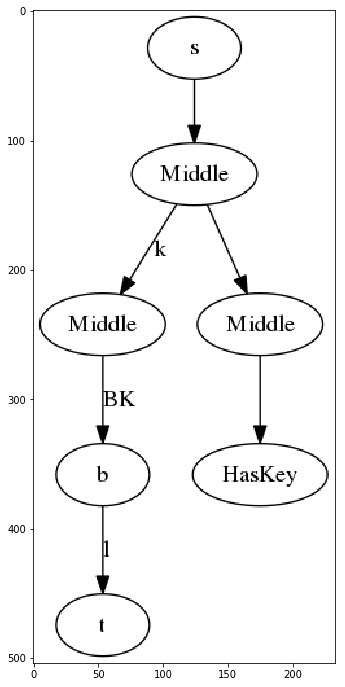

In [14]:
cloned.renumber()

temp,path = apply_rules(cloned,reverse_productions)
to_image(temp)